In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) 


Here are examples of loading data with different formats. 

In [2]:
import os
import json
def read_csv_space(path, file):
    return pd.read_csv(os.path.join(path, file), encoding='', sep='\s+', index_col=False, engine='python') 

def read_csv_comma(path, file):
    return pd.read_csv(os.path.join(path, file), encoding='', sep=',', engine='python') 

def json_load(path, file):
    with open(os.path.join(path, file), encoding='', mode='r') as f:
        v = json.load(f)
        f.close()
    return v

def read_text(path, file):
    with open(os.path.join(path, file),encoding='', mode='r') as f:
        lines = []
        for l in f:
            lines.append(l.rstrip('\n').split('\t'))
    return lines 

def table_load(self, path, file_name):
    df = pd.read_excel(os.path.join(path, file_name), engine='openpyxl', sheet_name=0)
    mylist = df['words'].tolist()
    return mylist

We still use the Boston housing price data for demostration. 

In [3]:
df = read_csv_comma("/kaggle/input/shrinkagedata", "housing.csv")
print("sample of data:", df.head())
print("variables:", df.columns)
print("number of observations:", len(df))


sample of data:    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
variables: Index(['longitude', 'latitude', 'housing_median_

Split data into training and test sample. 

In [4]:
print(df.isnull().values.any()) ## check if there are missing inputs
print(df.isnull().sum()) ## count number of missing for each column
df.dropna(inplace=True) ## drop observations with missing values
print("final number of observations:", len(df))

True
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
final number of observations: 20433


In [5]:
df['ocean_dummy']=(df['ocean_proximity'] == 'NEAR BAY').astype(int) # creat a dummy indication nearby ocean
feature_list = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'ocean_dummy', 'households', 'longitude', 'latitude']
target = 'median_house_value' 
y = df[target] / 100000
xmat = df[feature_list]
df['ocean_dummy']

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: ocean_dummy, Length: 20433, dtype: int64

In [6]:
# standardized data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(xmat)


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X_standardized,y,test_size=0.2,random_state=3)

In [8]:
# Apply polynomial feature expansion
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Create a DataFrame for better visualization
expanded_features = poly.get_feature_names_out(xmat.columns)
print(expanded_features)
print("size of the expanded feature space:", len(expanded_features))

['median_income' 'housing_median_age' 'total_rooms' 'total_bedrooms'
 'population' 'ocean_dummy' 'households' 'longitude' 'latitude'
 'median_income^2' 'median_income housing_median_age'
 'median_income total_rooms' 'median_income total_bedrooms'
 'median_income population' 'median_income ocean_dummy'
 'median_income households' 'median_income longitude'
 'median_income latitude' 'housing_median_age^2'
 'housing_median_age total_rooms' 'housing_median_age total_bedrooms'
 'housing_median_age population' 'housing_median_age ocean_dummy'
 'housing_median_age households' 'housing_median_age longitude'
 'housing_median_age latitude' 'total_rooms^2'
 'total_rooms total_bedrooms' 'total_rooms population'
 'total_rooms ocean_dummy' 'total_rooms households'
 'total_rooms longitude' 'total_rooms latitude' 'total_bedrooms^2'
 'total_bedrooms population' 'total_bedrooms ocean_dummy'
 'total_bedrooms households' 'total_bedrooms longitude'
 'total_bedrooms latitude' 'population^2' 'population ocean

# Linear regression 

In [11]:
reg = LinearRegression()
reg.fit(X_train_poly, y_train)
test_score=reg.score(X_test_poly,y_test)
print(test_score)

0.7355225860993571


# Lasso Regression

In [13]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_poly,y_train)
test_score=lasso.score(X_test_poly,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print(test_score)
print(lasso.coef_)

0.7230661208507703
[ 7.59073625e-01  7.55340834e-02 -0.00000000e+00  4.35233443e-01
 -5.17570037e-01  0.00000000e+00  1.64525545e-01 -4.96232904e-01
 -8.06526409e-01  5.18580795e-02  9.49015564e-02  9.15334767e-02
  0.00000000e+00 -2.45783251e-02 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  6.49291668e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.05352938e-02 -0.00000000e+00 -2.72649962e-02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.64216499e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.79565030e-02 -1.69095144e-02 -1.38579220e-02
 -1.21803347e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.590e+03, tolerance: 2.184e+00
  model = cd_fast.enet_coordinate_descent(


# Ridge regression

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5)
ridge.fit(X_train_poly,y_train)
test_score=ridge.score(X_test_poly,y_test)
print(test_score)


0.7480407527596256


# Elastic net

In [41]:
from sklearn.linear_model import ElasticNet
elas = ElasticNet(alpha=0.005, l1_ratio=0.5)
elas.fit(X_train_poly, y_train)
test_score=elas.score(X_test_poly,y_test)
print(test_score)


0.7570501123232487


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.225e+03, tolerance: 2.184e+00
  model = cd_fast.enet_coordinate_descent(


# Using K-fold cross validation (k=10) to tune the hyper parameter in Lasso regression

In [40]:
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0.0001, 1, 0.01)
grid['l1_ratio'] = np.arange(0.0001, 1, 0)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
#results = search.fit(X_train_poly, y)
# summarize
#print('MAE: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

# Using K-fold cross validation to tune the two hyper parameters in elastic net

In [30]:
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0.001, 1, 0.2)
grid['l1_ratio'] = np.arange(0, 1, 0.2)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
#results = search.fit(xmat, y)
# summarize
#print('MAE: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.984e+03, tolerance: 2.179e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.914e+03, tolerance: 2.152e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

MAE: -0.508
Config: {'alpha': 0.001, 'l1_ratio': 0.8}


An illustration of K-fold cross-validation

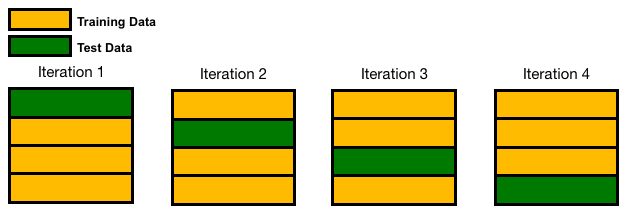!

# Codes implementing K-fold cross validation from scratch

In [14]:
from sklearn.utils import shuffle
def cross_validation_split(df, folds):
    df_copy = df.copy()
    group_size = int(df_copy.shape[0] / folds)
        
    # re-ordering rows of data set randomly
    df_copy = shuffle(df_copy)
    lst = [df_copy.iloc[i:i+group_size] for i in range(0,len(df_copy),group_size)]
    if len(lst[-1]) < group_size:
        lst.pop()
    return lst 

def lasso_cv(data_groups, alpha_test):
    lasso = Lasso(alpha=alpha_test)
    scores = []
    for i in range(len(data_groups)):
        data_copy = data_groups.copy()
        test_data = data_copy[i]
        X_test = test_data[X_list]
        y_test = test_data['Price']
        data_copy.pop(i)
        training_data = pd.concat(data_copy)
        X_train = training_data[X_list] 
        y_train = training_data['Price']
        lasso.fit(X_train,y_train)
        test_score=lasso.score(X_test,y_test)
        scores.append(test_score)
    return scores


# Example of using Least Angel Regressin to implement Lasso


In [23]:
from sklearn.linear_model import LassoLars
model = LassoLars(alpha=0.01)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
model.coef_

array([ 0.72592109,  0.14623703,  0.        ,  0.27461547, -0.3421401 ,
        0.01926967,  0.12302106, -0.73849746, -0.79837329])

# Examples of implementing principle component regression (PCR)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# first normalize data
sc = StandardScaler()
x = sc.fit_transform(xmat)

# now run PCA on the normalized data
pca = PCA(n_components = 8)
X_reduced = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Now we try to develop a regression model on the components
X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.2,random_state=3)
reg = LinearRegression()
reg.fit(X_train, y_train)
test_score=reg.score(X_test,y_test)
print(test_score)

[0.43534486 0.24403326 0.11906859 0.10906385 0.06073833 0.01646077
 0.00858789 0.00505582]
0.655960620060666


# Example of Partial Least Squares in Python

In [31]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=8)
pls.fit(X_train, y_train)
pls.score(X_test, y_test)

0.655960620060666